# Pokémon AI

Evaluation

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from src.battle import Battle
from src.classes import Bag, Party, Player, Move, MoveBank, Pokemon, Stats, PokemonType
from src.data import get_random_party, get_party
from src.ai import DamageModel, PorygonModel, RandomModel

PORYGON_MODEL_NAME = "Porygon"
RANDOM_MODEL_NAME  = "Random (Opponent)"
GENIUS_MODEL_NAME  = "Genius (Opponent)"

NUM_GAMES_PER_MATCH = 3

# Create a team class for grouping team-related details
class Team:
    def __init__(self, name, party, color = '#bfbfbf'):
        self.name = name
        self.party = party
        self.color = color

def test_teams(team_a: Team, team_b: Team, opposing_model_name: str = RANDOM_MODEL_NAME):
    player_wins_a = player_wins_b = 0
    opponent_wins_a = opponent_wins_b = 0
    for _ in range(NUM_GAMES_PER_MATCH):
        for team_1, team_2 in [(team_a, team_b), (team_b, team_a)]:
            player1 = Player(PORYGON_MODEL_NAME, team_1.party, Bag(), PorygonModel())
            player2 = Player(opposing_model_name, team_2.party, Bag(), RandomModel() if opposing_model_name == RANDOM_MODEL_NAME else DamageModel())
            
            battle = Battle(player1, player2, 0)
            winner = battle.play()
            
            did_win = winner and winner.get_name() == PORYGON_MODEL_NAME
            
            if team_1 == team_a:
                player_wins_a += int(did_win)
                opponent_wins_b += int(not did_win)
            else:
                player_wins_b += int(did_win)
                opponent_wins_a += int(not did_win)
            
    return player_wins_a, player_wins_b, opponent_wins_a, opponent_wins_b

def plot_performance(team_a: Team, team_b: Team, player_wins_a: int, player_wins_b: int, opponent_wins_a: int, opponent_wins_b: int, opposing_model_name: str = RANDOM_MODEL_NAME):
    ind = np.arange(2)  # the x locations for the groups
    width = 0.4        # the width of the bars
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    rects1 = ax.bar(ind-width/2, [player_wins_a, opponent_wins_a], width, color=team_a.color)
    rects2 = ax.bar(ind+width/2, [player_wins_b, opponent_wins_b], width, color=team_b.color)
    
    ax.set_title('%s vs. %s' % (PORYGON_MODEL_NAME, opposing_model_name))
    ax.set_xlabel('Team Used')
    ax.set_ylabel('Number of Wins')
    ax.set_xticks(ind)
    ax.set_xticklabels((PORYGON_MODEL_NAME, opposing_model_name))
    ax.legend((rects1[0], rects2[0]), (team_a.name, team_b.name))
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    plt.show()

## Monotype

Create several monotype parties.

TODO: Add reasoning here

In [90]:
water_monotype = get_party(
    'Wartortle',
    'Poliwhirl',
    'Tentacruel',
    'Goldeen',
    'Starmie',
    'Vaporeon',
)
water_team = Team('WATER Monotype', water_monotype, '#6390F0')
print("\n%s\n" % str(water_team.party))

fire_monotype = get_party(
    'Charmeleon',
    'Vulpix',
    'Ninetales',
    'Growlithe',
    'Ponyta',
    'Flareon',
)
fire_team = Team('FIRE Monotype', fire_monotype, '#EE8130')
print("\n%s\n" % str(fire_team.party))

grass_monotype = get_party(
    'Venusaur',
    'Vileplume',
    'Weepinbell',
    'Victreebel',
    'Exeggcute',
    'Tangela',
)
grass_team = Team('GRASS Monotype', grass_monotype, '#7AC74C')
print("\n%s\n" % str(grass_team.party))

normal_monotype = get_party(
    'Pidgeot',
    'Raticate',
    'Fearow',
    'Wigglytuff',
    'Persian',
    'Chansey',
)
normal_team = Team('NORMAL Monotype', normal_monotype, '#A8A77A')
print("\n%s\n" % str(normal_team.party))

bug_monotype = get_party(
    'Butterfree',
    'Beedrill',
    'Paras',
    'Venonat',
    'Scyther',
    'Caterpie',
)
bug_team = Team('BUG Monotype', bug_monotype, '#A6B91A')
print("\n%s\n" % str(bug_team.party))

poison_monotype = get_party(
    'Arbok',
    'Nidorina',
    'Nidoqueen',
    'Nidoran-m',
    'Nidorino',
    'Zubat',
)
poison_team = Team('POISON Monotype', poison_monotype, '#A33EA1')
print("\n%s\n" % str(poison_team.party))

electric_monotype = get_party(
    'Pikachu',
    'Magnemite',
    'Magneton',
    'Voltorb',
    'Electabuzz',
    'Jolteon',
)
electric_team = Team('ELECTRIC Monotype', electric_monotype, '#F7D02C')
print("\n%s\n" % str(electric_team.party))

ground_monotype = get_party(
    'Sandshrew',
    'Sandslash',
    'Diglett',
    'Rhyhorn',
    'Cubone',
    'Marowak',
)
ground_team = Team('GROUND Monotype', ground_monotype, '#E2BF65')
print("\n%s\n" % str(ground_team.party))

fighting_monotype = get_party(
    'Machop',
    'Machoke',
    'Machamp',
    'Hitmonchan',
    'Machoke',
    'Machamp',
)
fighting_team = Team('FIGHTING Monotype', fighting_monotype, '#C22E28')
print("\n%s\n" % str(fighting_team.party))

rock_monotype = get_party(
    'Omanyte',
    'Omastar',
    'Kabuto',
    'Kabutops',
    'Aerodactyl',
    'Aerodactyl',
)
rock_team = Team('ROCK Monotype', rock_monotype, '#B6A136')
print("\n%s\n" % str(rock_team.party))

ice_monotype = get_party(
    'Jynx',
    'Jynx',
    'Articuno',
    'Jynx',
    'Jynx',
    'Articuno',
)
ice_team = Team('ICE Monotype', ice_monotype, '#B6A136')
print("\n%s\n" % str(ice_team.party))

psychic_monotype = get_party(
    'Abra',
    'Kadabra',
    'Alakazam',
    'Mewtwo',
    'Mew',
    'Hypno',
)
psychic_team = Team('PSYCHIC Monotype', psychic_monotype, '#F95587')
print("\n%s\n" % str(psychic_team.party))

ghost_monotype = get_party(
    'Gastly',
    'Haunter',
    'Gengar',
    'Gastly',
    'Haunter',
    'Gengar',
)
ghost_team = Team('GHOST Monotype', ghost_monotype, '#735797')
print("\n%s\n" % str(ghost_team.party))


1. Wartortle (WATER) 228/228 HP
    · Hidden-power 15/15 PP  · Facade 20/20 PP  · Rock-tomb 15/15 PP  · Rollout 20/20 PP  
2. Poliwhirl (WATER) 240/240 HP
    · Water-gun 25/25 PP  · Thief 25/25 PP  · Waterfall 15/15 PP  · Bulldoze 20/20 PP  
3. Tentacruel (WATER) 270/270 HP
    · Blizzard 5/5 PP  · Brine 10/10 PP  · Waterfall 15/15 PP  · Giga-impact 5/5 PP  
4. Goldeen (WATER) 200/200 HP
    · Fury-attack 20/20 PP  · Hydro-pump 5/5 PP  · Knock-off 20/20 PP  · Megahorn 10/10 PP  
5. Starmie (WATER) 230/230 HP
    · Take-down 20/20 PP  · Secret-power 20/20 PP  · Twister 20/20 PP  · Brine 10/10 PP  
6. Vaporeon (WATER) 370/370 HP
    · Water-pulse 20/20 PP  · Water-gun 25/25 PP  · Signal-beam 15/15 PP  · Icy-wind 15/15 PP  


1. Charmeleon (FIRE) 226/226 HP
    · Power-up-punch 20/20 PP  · Secret-power 20/20 PP  · Rage 20/20 PP  · Ember 25/25 PP  
2. Vulpix (FIRE) 186/186 HP
    · Heat-wave 10/10 PP  · Secret-power 20/20 PP  · Quick-attack 30/30 PP  · Ember 25/25 PP  
3. Ninetales (FIRE

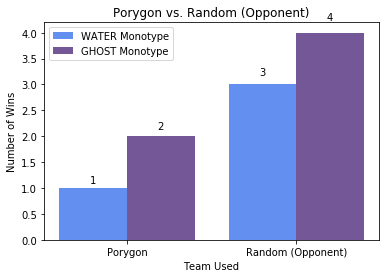

In [91]:
TEAM_A = water_team
TEAM_B = ghost_team

player_wins_a, player_wins_b, opponent_wins_a, opponent_wins_b = 1, 2, 3, 4

plot_performance(TEAM_A, TEAM_B, player_wins_a, player_wins_b, opponent_wins_a, opponent_wins_b)

### Random Opponent

### Super Genius Opponent



## Strategic Types

Create several strategically-typed parties.

TODO: Add reasoning here